Student Name: Tushara Govinda Reddy

Student ID:  220129510


**Assignment 1, part 2 of 2**
Please show your work - i.e., show and explain your code/math, and write your reasoning.

[1 mark] Take the graduation rate dataset from the beginning of the notebook, and change the 'parental level of education' attribute so that it is ordered, just as we did earlier. Split the dataset into two groups: those with a level of at least high school, and those below.

Show a quantile-quantile plot of the 'parental income' for these two groups and report the results. What can you conclude about the relationship between these two attributes, just by looking at this plot?
Now show a quantile-quantile plot, but of the 'years to graduate' variable, instead of 'parental income'. What can you infer?

In [ ]:
# Loading dataset (http://roycekimmons.com/tools/generated_data)
import pandas as pd

df = pd.read_csv('graduation_rate.csv')
print(df['parental level of education'].unique())

["master's degree" 'some college' 'some high school' "bachelor's degree"
 "associate's degree" 'high school']


In [ ]:
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)

display(df['parental level of education'])

0        master's degree
1           some college
2       some high school
3       some high school
4      bachelor's degree
             ...        
995          high school
996         some college
997          high school
998         some college
999     some high school
Name: parental level of education, Length: 1000, dtype: category
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' <
                         'bachelor's degree' < 'master's degree']

In [ ]:
#Note that a boolean sequence can be used to index a DataFrame
highedu= df[df['parental level of education'] >= 'high school']
lowedu = df[df['parental level of education'] < 'high school']
highedu

ACT composite score  SAT total score parental level of education  \
0                     30             2206             master's degree   
1                     26             1953                some college   
4                     30             2168           bachelor's degree   
5                     25             1854           bachelor's degree   
6                     30             2016          associate's degree   
..                   ...              ...                         ...   
994                   27             1937                some college   
995                   30             1967                 high school   
996                   28             2066                some college   
997                   27             1971                 high school   
998                   30             2057                some college   

     parental income  high school gpa  college gpa  years to graduate  
0              94873              4.0          3.8                  3  
1              42767              3.6          2.7                  9  
4              92665              4.0          3.6                  4  
5              76340              3.5          3.3                  4  
6              65867              3.8          3.7                  3  
..               ...              ...          ...                ...  
994            50925              3.6          3.0                  7  
995            49002              3.8          3.5                  6  
996            83438              3.9          3.5                  4  
997            68577              3.6          3.7                  5  
998            56876              3.8          3.6                  3  

[804 rows x 7 columns]

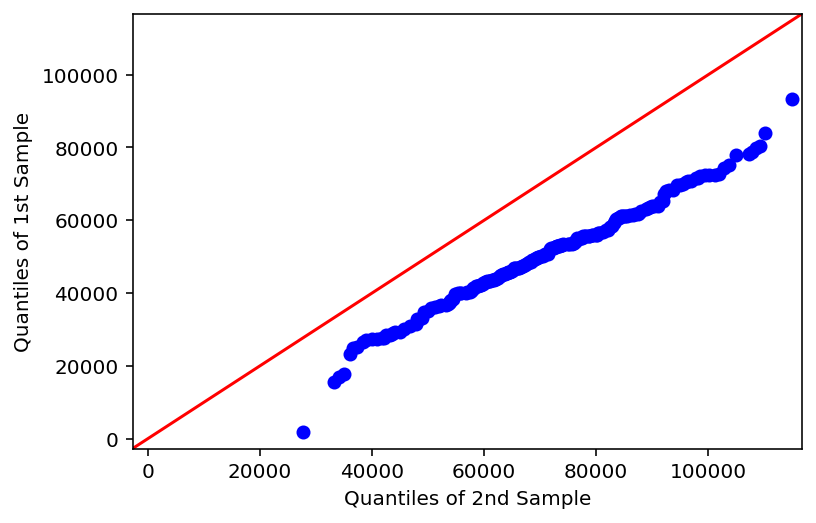

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = highedu['parental income']
y = lowedu['parental income']
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_y, pp_x,line='45')
plt.show()

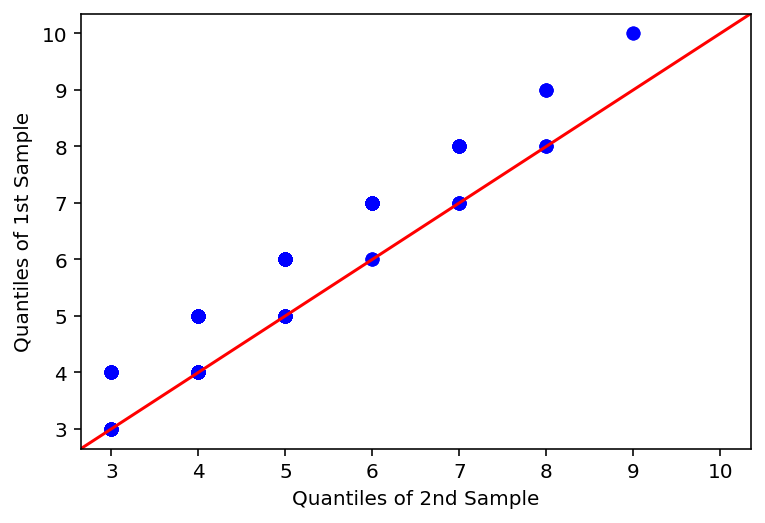

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = highedu['years to graduate']
y = lowedu['years to graduate']
pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)
qqplot_2samples(pp_y, pp_x, line='45')
plt.show()

[1 mark] Load the wine dataset (see the snippet at the bottom). Note that it contains observations of three classes. For each class, report the following univariate summaries of the 'alcohol' attribute: count, mean, min, max, quartiles and standard deviation.

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
data=datasets.load_wine()
df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])
df0 = df[df["target"]== 0]
df1 = df[df["target"]== 1]
df2 = df[df["target"]== 2]

In [ ]:
df0.describe()

alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  59.000000   59.000000  59.000000          59.000000   59.000000   
mean   13.744746    2.010678   2.455593          17.037288  106.338983   
std     0.462125    0.688549   0.227166           2.546322   10.498949   
min    12.850000    1.350000   2.040000          11.200000   89.000000   
25%    13.400000    1.665000   2.295000          16.000000   98.000000   
50%    13.750000    1.770000   2.440000          16.800000  104.000000   
75%    14.100000    1.935000   2.615000          18.700000  114.000000   
max    14.830000    4.040000   3.220000          25.000000  132.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      59.000000   59.000000             59.000000        59.000000   
mean        2.840169    2.982373              0.290000         1.899322   
std         0.338961    0.397494              0.070049         0.412109   
min         2.200000    2.190000              0.170000         1.250000   
25%         2.600000    2.680000              0.255000         1.640000   
50%         2.800000    2.980000              0.290000         1.870000   
75%         3.000000    3.245000              0.320000         2.090000   
max         3.880000    3.930000              0.500000         2.960000   

       color_intensity        hue  od280/od315_of_diluted_wines      proline  \
count        59.000000  59.000000                     59.000000    59.000000   
mean          5.528305   1.062034                      3.157797  1115.711864   
std           1.238573   0.116483                      0.357077   221.520767   
min           3.520000   0.820000                      2.510000   680.000000   
25%           4.550000   0.995000                      2.870000   987.500000   
50%           5.400000   1.070000                      3.170000  1095.000000   
75%           6.225000   1.130000                      3.420000  1280.000000   
max           8.900000   1.280000                      4.000000  1680.000000   

       target  
count    59.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0

In [ ]:
df1.describe()

alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  71.000000   71.000000  71.000000          71.000000   71.000000   
mean   12.278732    1.932676   2.244789          20.238028   94.549296   
std     0.537964    1.015569   0.315467           3.349770   16.753497   
min    11.030000    0.740000   1.360000          10.600000   70.000000   
25%    11.915000    1.270000   2.000000          18.000000   85.500000   
50%    12.290000    1.610000   2.240000          20.000000   88.000000   
75%    12.515000    2.145000   2.420000          22.000000   99.500000   
max    13.860000    5.800000   3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      71.000000   71.000000             71.000000        71.000000   
mean        2.258873    2.080845              0.363662         1.630282   
std         0.545361    0.705701              0.123961         0.602068   
min         1.100000    0.570000              0.130000         0.410000   
25%         1.895000    1.605000              0.270000         1.350000   
50%         2.200000    2.030000              0.370000         1.610000   
75%         2.560000    2.475000              0.430000         1.885000   
max         3.520000    5.080000              0.660000         3.580000   

       color_intensity        hue  od280/od315_of_diluted_wines     proline  \
count        71.000000  71.000000                     71.000000   71.000000   
mean          3.086620   1.056282                      2.785352  519.507042   
std           0.924929   0.202937                      0.496573  157.211220   
min           1.280000   0.690000                      1.590000  278.000000   
25%           2.535000   0.925000                      2.440000  406.500000   
50%           2.900000   1.040000                      2.830000  495.000000   
75%           3.400000   1.205000                      3.160000  625.000000   
max           6.000000   1.710000                      3.690000  985.000000   

       target  
count    71.0  
mean      1.0  
std       0.0  
min       1.0  
25%       1.0  
50%       1.0  
75%       1.0  
max       1.0

In [ ]:
df2.describe()

alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  48.000000   48.000000  48.000000          48.000000   48.000000   
mean   13.153750    3.333750   2.437083          21.416667   99.312500   
std     0.530241    1.087906   0.184690           2.258161   10.890473   
min    12.200000    1.240000   2.100000          17.500000   80.000000   
25%    12.805000    2.587500   2.300000          20.000000   89.750000   
50%    13.165000    3.265000   2.380000          21.000000   97.000000   
75%    13.505000    3.957500   2.602500          23.000000  106.000000   
max    14.340000    5.650000   2.860000          27.000000  123.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      48.000000   48.000000              48.00000        48.000000   
mean        1.678750    0.781458               0.44750         1.153542   
std         0.356971    0.293504               0.12414         0.408836   
min         0.980000    0.340000               0.17000         0.550000   
25%         1.407500    0.580000               0.39750         0.855000   
50%         1.635000    0.685000               0.47000         1.105000   
75%         1.807500    0.920000               0.53000         1.350000   
max         2.800000    1.570000               0.63000         2.700000   

       color_intensity        hue  od280/od315_of_diluted_wines     proline  \
count        48.000000  48.000000                     48.000000   48.000000   
mean          7.396250   0.682708                      1.683542  629.895833   
std           2.310942   0.114441                      0.272111  115.097043   
min           3.850000   0.480000                      1.270000  415.000000   
25%           5.437500   0.587500                      1.510000  545.000000   
50%           7.550000   0.665000                      1.660000  627.500000   
75%           9.225000   0.752500                      1.820000  695.000000   
max          13.000000   0.960000                      2.470000  880.000000   

       target  
count    48.0  
mean      2.0  
std       0.0  
min       2.0  
25%       2.0  
50%       2.0  
75%       2.0  
max       2.0

[1 mark] Drop the 'target' attribute from the wine dataset and draw a 2D scatter plot using MDS. Use the code from section 1.10 in this notebook. Is the plot satisfactory? If yes, what steps did you take to improve the quality of the representation? If not, try to run preprocessing steps to improve the quality of the plot.

In [ ]:
#df = df.drop(['target'], axis=1)
df['target'].unique()

array([0., 1., 2.])

In [ ]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0     0.0  
1                            3.40   1050.0     0.0  
2                            3.17   1185.0     0.0  
3                            3.45   1480.0     0.0  
4                            2.93    735.0     0.0  
..                            ...      ...     ...  
173                          1.74    740.0     2.0  
174                          1.56    750.0     2.0  
175                          1.56    835.0     2.0  
176                          1.62    840.0     2.0  
177                          1.60    560.0     2.0  

[178 rows x 14 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='target', ascending=True)
target_sorted_values = df_sorted['target']

X = df_sorted.drop(columns='target').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

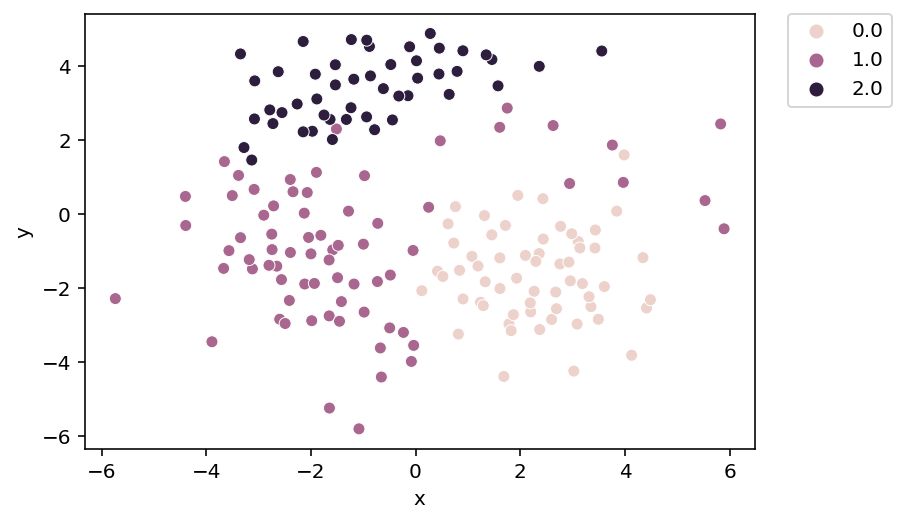

<function matplotlib.pyplot.savefig>

In [ ]:
from sklearn.manifold import MDS
%config InlineBackend.figure_formats = set(['retina'])
import seaborn as sns
import matplotlib.pyplot as plt
embedding = MDS(n_components=2)

Xp = embedding.fit_transform(X)

df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],'target': target_sorted_values})

sns.scatterplot(x='x', y='y', hue='target', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
plt.savefig

[1 mark] Based on a scatter matrix of the wine dataset, select three attributes that you think would be useful for building a classifier. Remember to justify your choice. Use the selected features to compute an MDS-based 2D embedding and show the resulting points in a scatter plot. Is the result comparable to the one obtained in the previous question? What are the advantages and/or disadvantages of this approach?

Tip: In order to facilitate the inspection of the scatter matrix plot, you can save it to a file by running the following command, immediately after the plot command: plt.savefig('output.pdf')

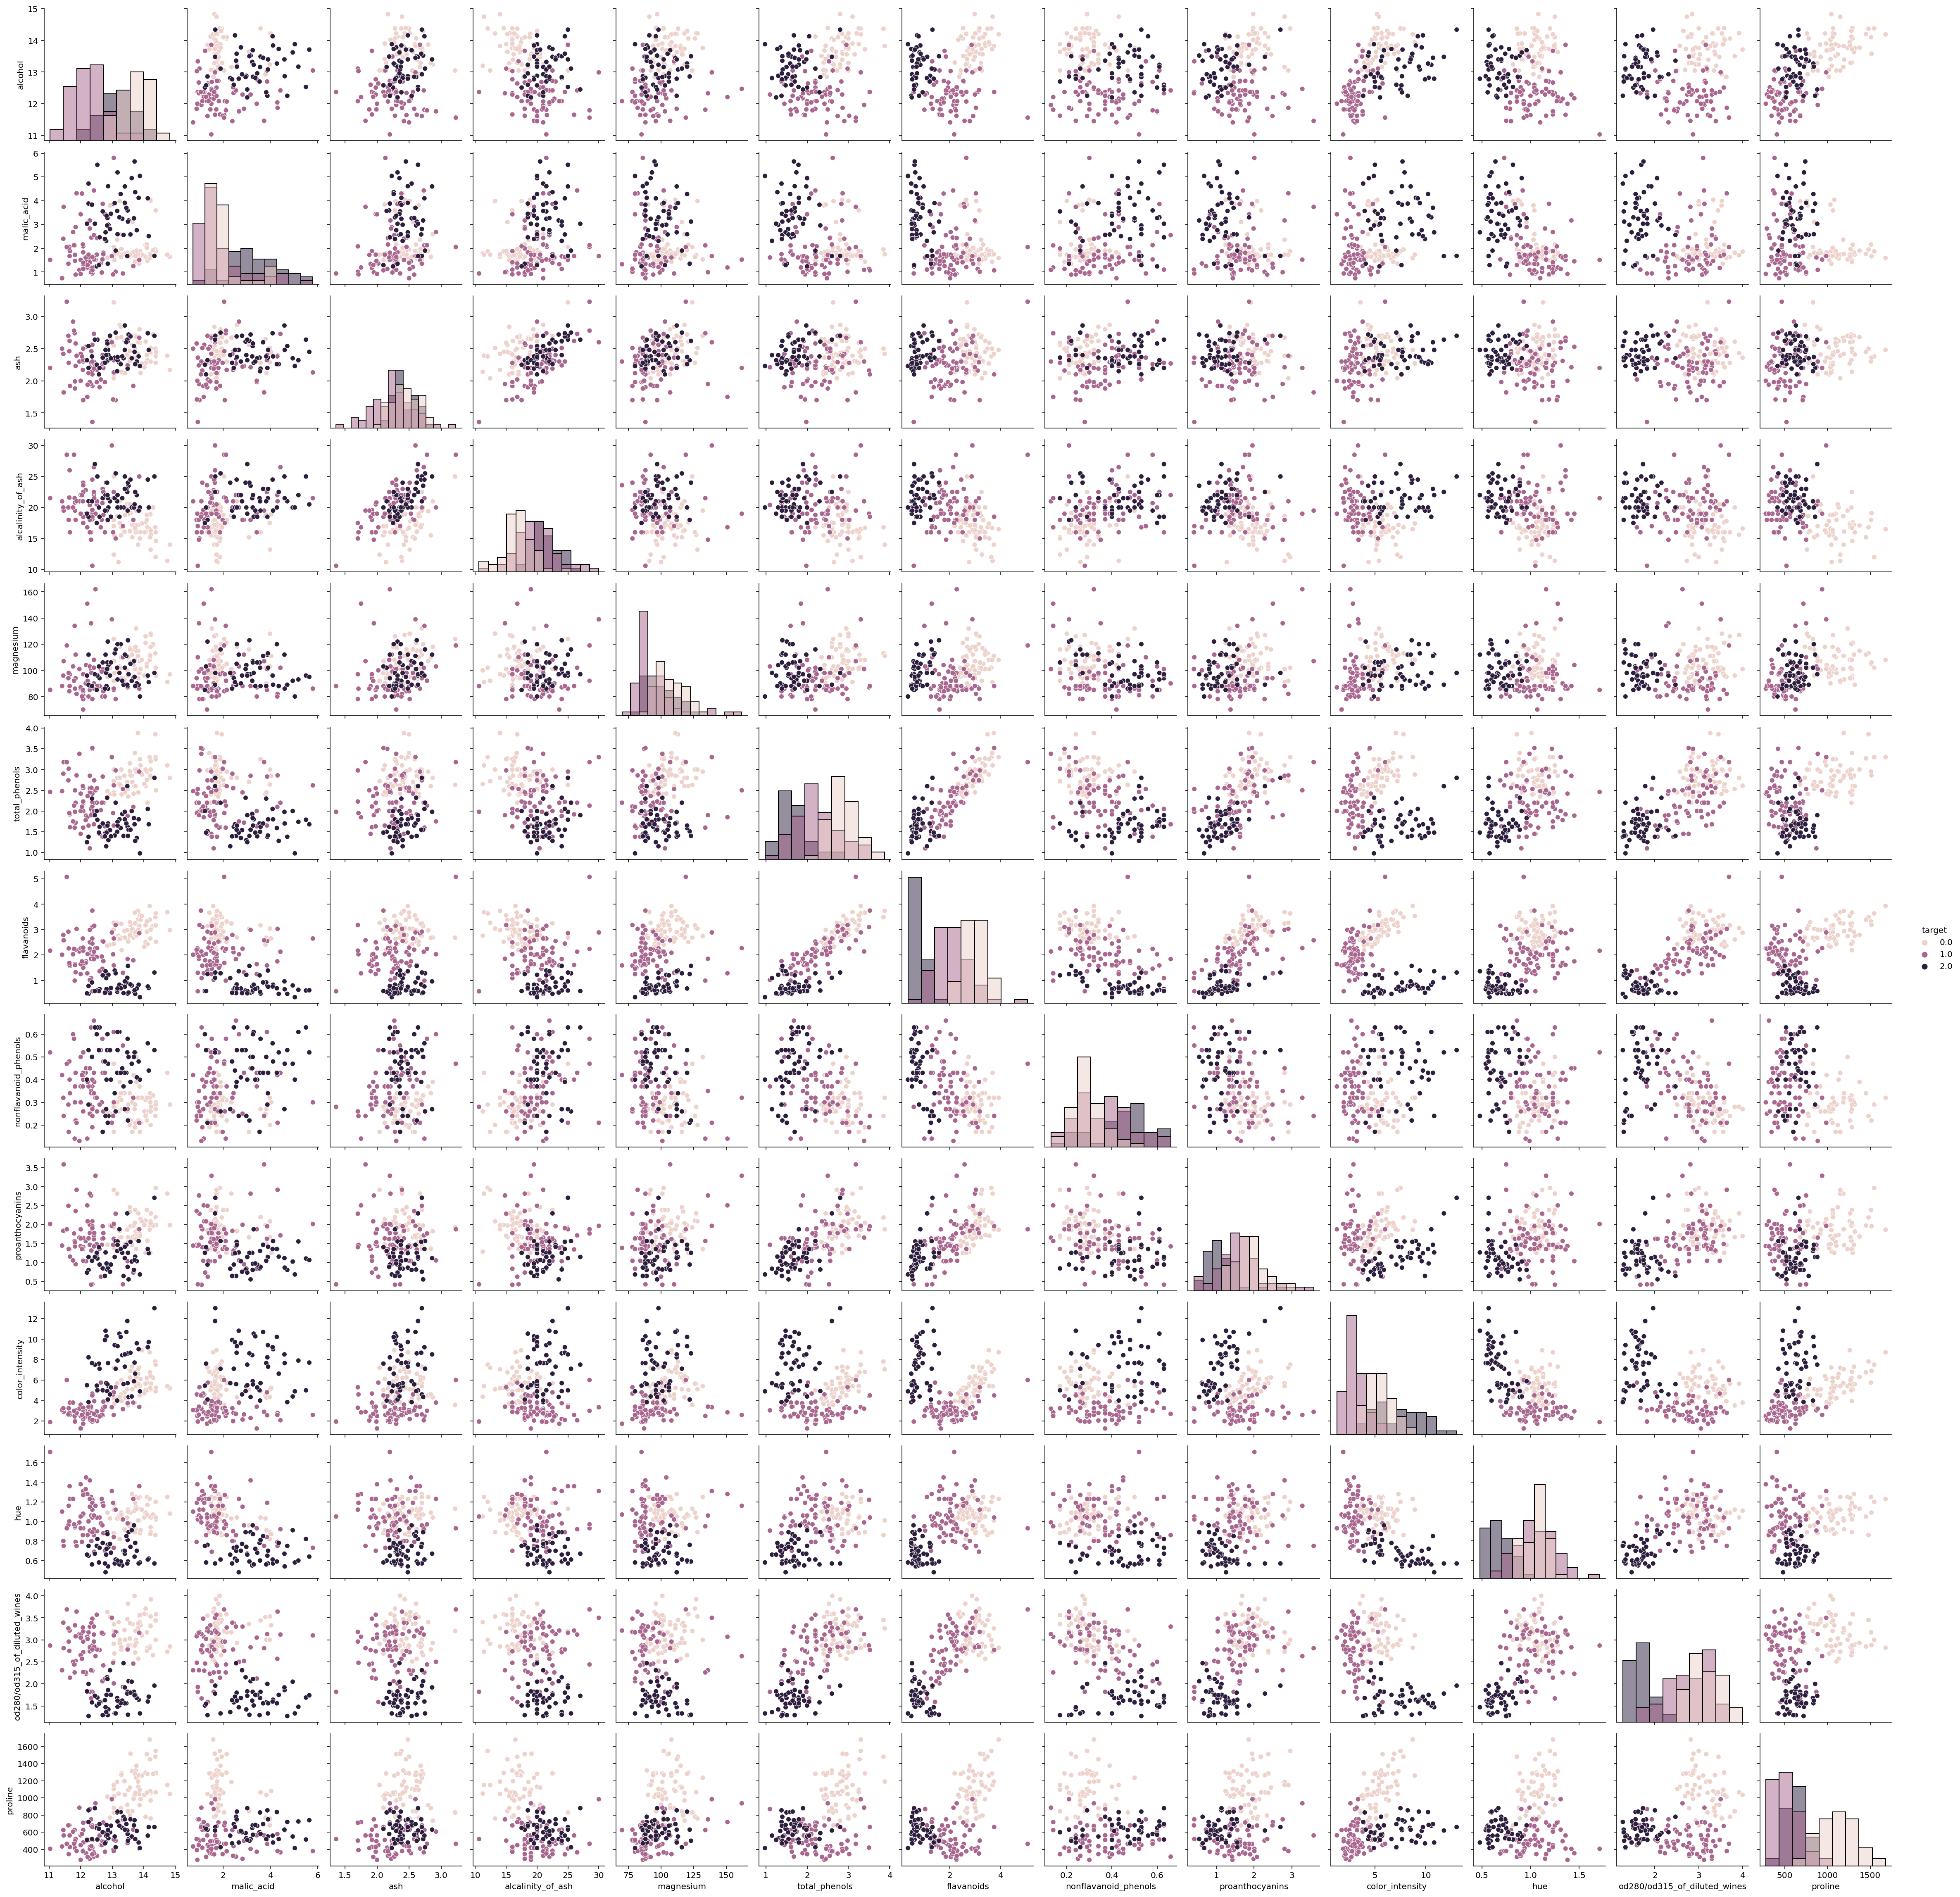

<function matplotlib.pyplot.savefig>

In [ ]:
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()
plt.savefig

In [ ]:
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='target', ascending=True)
target_sorted_values = df_sorted['target']

X = df_sorted[['alcohol','od280/od315_of_diluted_wines','proline']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

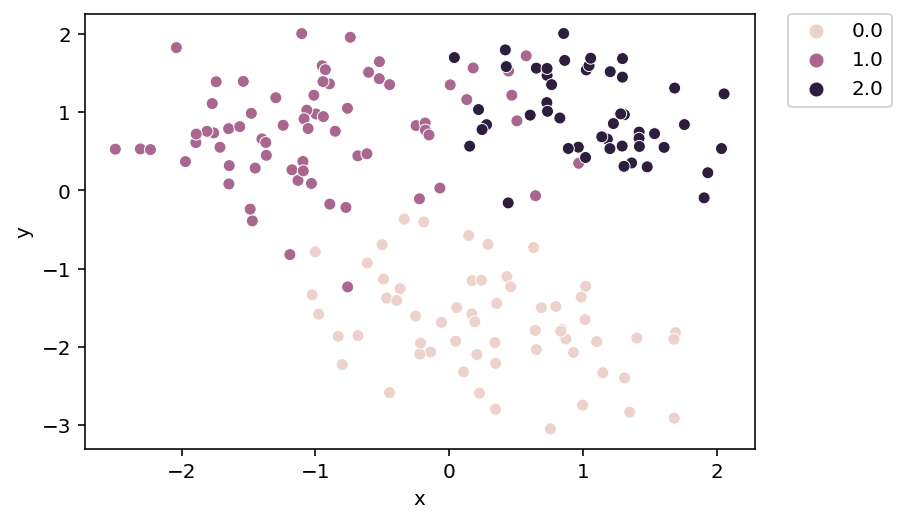

<function matplotlib.pyplot.savefig>

In [ ]:
from sklearn.manifold import MDS
%config InlineBackend.figure_formats = set(['retina'])
import seaborn as sns
import matplotlib.pyplot as plt
embedding = MDS(n_components=2)

Xp = embedding.fit_transform(X)

df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],'target': target_sorted_values})

sns.scatterplot(x='x', y='y', hue='target', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
plt.savefig


[1 mark] Consider the mystery.csv dataset. Compute its first principal direction (or principal component) using PCA (that is, the leading eigenvector of the covariance matrix). Reshape this vector to dimension 60x79 and plot it as a heatmap. What do you see? What type of data do you think this dataset contains?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numComponents = 1
data =  pd.read_csv('mystery.csv', delimiter=' ', quotechar='"')
data = data.fillna(data.mean())
data_array = data.copy()
#data_array = data.to_numpy()

pca = PCA(n_components=numComponents)
projected = pca.fit_transform(data_array.T)
projected = pd.DataFrame(projected)
reshaped_projected= projected.values.reshape(60,79)
print(reshaped_projected)



[[-2.36482011 -2.39727567 -2.3994367  ... -3.54061684 -3.54406348
  -3.51205272]
 [-3.49326968 -3.5013571  -3.50596903 ... -3.53198927 -3.50257967
  -3.43973266]
 [-3.45628816 -3.46675862 -3.47392352 ... -3.49098969 -3.50094905
  -3.43157491]
 ...
 [-3.08866368 -3.08716557 -3.06954271 ... -2.2492542  -2.25269704
  -2.14454836]
 [-2.74812082 -2.74948334 -2.76316621 ... -2.13219878 -2.12047773
  -1.98570584]
 [-1.43221533 -1.42123327 -1.43458205 ... -0.20578398 -0.25610937
  -0.21669755]]


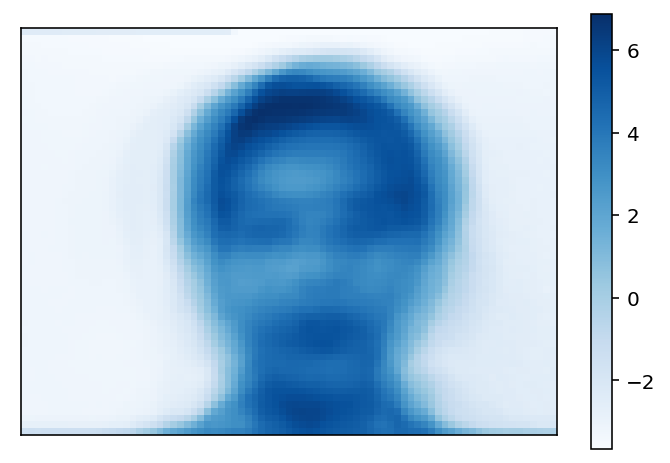

In [ ]:
import matplotlib.pyplot as plt
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(reshaped_projected, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()